# Predict Customer Clicked Ads Classification by Using Machine Learning

## Import Library and Dataset

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import rcParams
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r'Clicked Ads Dataset.csv')
pd.set_option('display.max_column', None)
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  987 non-null    float64
 1   Age                       1000 non-null   int64  
 2   Area Income               987 non-null    float64
 3   Daily Internet Usage      989 non-null    float64
 4   Male                      997 non-null    object 
 5   Timestamp                 1000 non-null   object 
 6   Clicked on Ad             1000 non-null   object 
 7   city                      1000 non-null   object 
 8   province                  1000 non-null   object 
 9   category                  1000 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 78.2+ KB


In [5]:
df.duplicated().sum()

0

In [6]:
cat_col = df.dtypes[df.dtypes == 'object'].index
num_col = df.select_dtypes(include=['float', 'int']).columns

In [7]:
df[num_col].describe().T

,count,mean,std,min,25%,50%,75%,max
Daily Time Spent on Site,987.0,6.492952e+01,1.584470e+01,32.60,5.127000e+01,6.811000e+01,7.846000e+01,9.143000e+01
Age,1000.0,3.600900e+01,8.785562e+00,19.00,2.900000e+01,3.500000e+01,4.200000e+01,6.100000e+01
Area Income,987.0,3.848647e+08,9.407999e+07,97975500.00,3.286330e+08,3.990683e+08,4.583554e+08,5.563936e+08
Daily Internet Usage,989.0,1.798636e+02,4.387014e+01,104.78,1.387100e+02,1.826500e+02,2.187900e+02,2.670100e+02


In [8]:
df[cat_col].describe().T

,count,unique,top,freq
Male,997,2,Perempuan,518
Timestamp,1000,997,5/26/2016 15:40,2
Clicked on Ad,1000,2,No,500
city,1000,30,Surabaya,64
province,1000,16,Daerah Khusus Ibukota Jakarta,253
category,1000,10,Otomotif,112


In [9]:
sum_missing = df.isna().sum()
percent_missing = round(df.isnull().sum() *100 / len(df),2)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'sum_missing': sum_missing,
                                 'percent_missing': percent_missing}).reset_index(drop=True).sort_values(by='sum_missing', ascending=False)
missing_value_df

,column_name,sum_missing,percent_missing
0,Daily Time Spent on Site,13,1.3
2,Area Income,13,1.3
3,Daily Internet Usage,11,1.1
4,Male,3,0.3
1,Age,0,0.0
5,Timestamp,0,0.0
6,Clicked on Ad,0,0.0
7,city,0,0.0
8,province,0,0.0
9,category,0,0.0


## EDA

### Univariate

In [10]:
to_plot = ['Daily Time Spent on Site','Age','Daily Internet Usage']

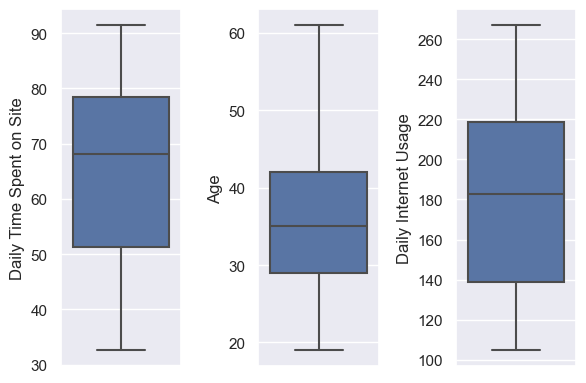

In [11]:
sns.set_theme(style="darkgrid")
sns.color_palette("viridis", as_cmap=True)
plt.figure(figsize=(8,4))
for i in range(0, len(to_plot)):
    plt.subplot(1, 4, i+1)
    sns.boxplot(y=df[to_plot[i]], orient='v')
    plt.tight_layout()

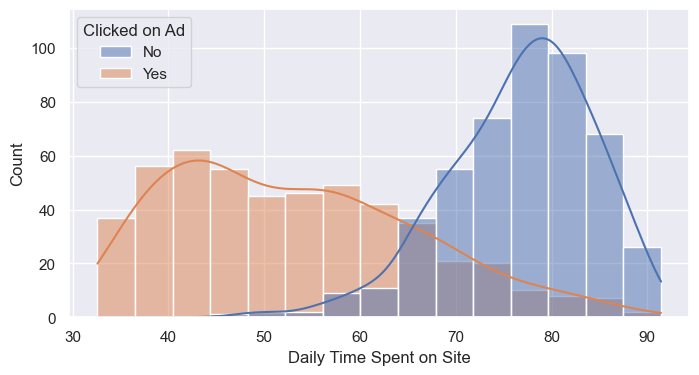

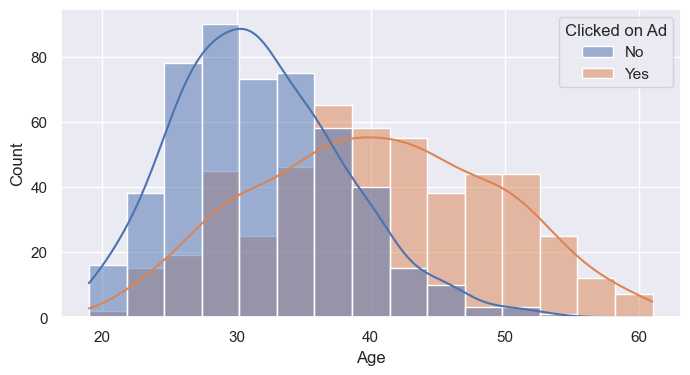

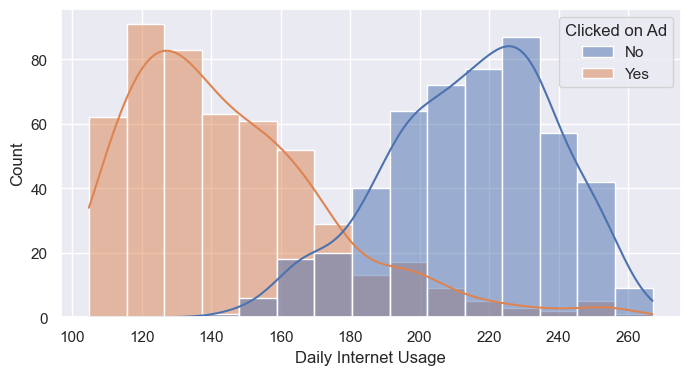

In [12]:
for i in to_plot:
    plt.figure(figsize=(8,4))
    sns.histplot(data=df, x=i, kde= True, bins= 15, hue='Clicked on Ad')
    plt.show()

#### Analisis
Dari plot diatas dapat diinterpretasikan:
1. User den

### Bivariate

In [33]:
plott = ['Daily Time Spent on Site','Age','Daily Internet Usage','Clicked on Ad']

<Figure size 640x480 with 0 Axes>

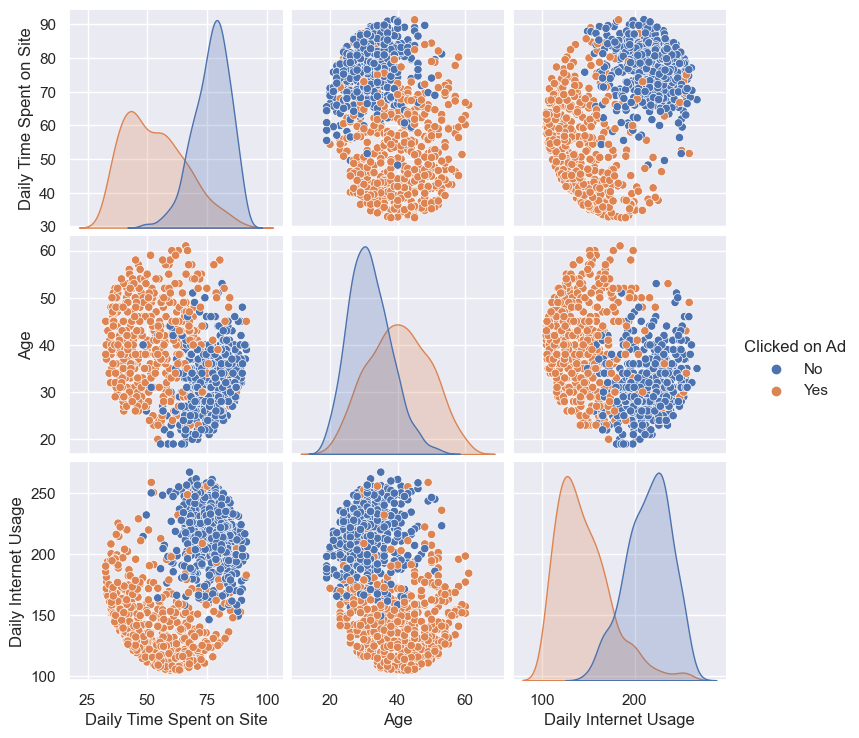

In [34]:
plt.figure()
sns.pairplot(df[plott], hue= 'Clicked on Ad', corner=False)
plt.show()

In [13]:
df[to_plot].describe().T

,count,mean,std,min,25%,50%,75%,max
Daily Time Spent on Site,987.0,64.929524,15.844699,32.60,51.27,68.11,78.46,91.43
Age,1000.0,36.009000,8.785562,19.00,29.00,35.00,42.00,61.00
Daily Internet Usage,989.0,179.863620,43.870142,104.78,138.71,182.65,218.79,267.01


In [14]:
fig = px.scatter(df, x='Daily Time Spent on Site', y='Age', color='Clicked on Ad',
                 template='plotly_dark', width=700, height=500)
fig.show()

In [15]:
fig = px.scatter(df, x='Daily Time Spent on Site', y='Daily Internet Usage', color='Clicked on Ad',
                 template='plotly_dark', width=700, height=500)
fig.show()

In [16]:
fig = px.scatter(df, x='Age', y='Daily Internet Usage', color='Clicked on Ad',
                 template='plotly_dark', width=700, height=500)
fig.show()

#### Catego

### Multivariate

In [17]:
fig = px.scatter_3d(df, x='Daily Time Spent on Site', y='Daily Internet Usage',z='Age', color='Clicked on Ad',
                    template='plotly_dark', width=1200, height=800)
fig.show()

In [19]:
hm = df[to_plot].corr()
fig = px.imshow(hm, text_auto=".2f", color_continuous_scale='ice',
                template='plotly_dark',width=500,height=500)
fig.show()